<a href="https://colab.research.google.com/github/wue1atwit/ExamDatatset/blob/main/ExamDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Exam Dataset</h1>
<h4>By: Ethan Wu and Payton Falcone</h4>



<h2>Questions:</h2>
<ul>
  <li>What is the distribution between all scores?</li>
  <li>What is the correlation between grades and test preparation?</li>
  <li>What is the correlation between grades and groups?</li>
  <li>What is the correlation between grades and lunch?</li>
  <li>What is the correlation between grades and gender?</li>
  <li>What is the correlation between grades and parent's level of education?</li>
  


</ul>




In [21]:
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [22]:
examSet = pd.read_csv("https://raw.githubusercontent.com/wue1atwit/ExamDatatset/main/exams.csv").sort_values("race/ethnicity")
examSet.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
369,female,group A,high school,standard,none,70,75,74
376,female,group A,high school,standard,none,85,91,89
388,male,group A,associate's degree,free/reduced,completed,82,82,78
399,female,group A,some college,free/reduced,completed,53,70,69


In [23]:
# Checks if there is any NULL and NA values
print(examSet.isnull().sum(), "\n")
print(examSet.isna().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [24]:
# Split into two DataFrame for both genders
mSet = examSet.loc[examSet["gender"] == "male"]
fSet = examSet.loc[examSet["gender"] == "female"]

In [25]:
# Average 
avgSet = examSet.copy()
avgSet["avgScore"] = avgSet[["math score", "reading score", "writing score"]].mean(axis=1)

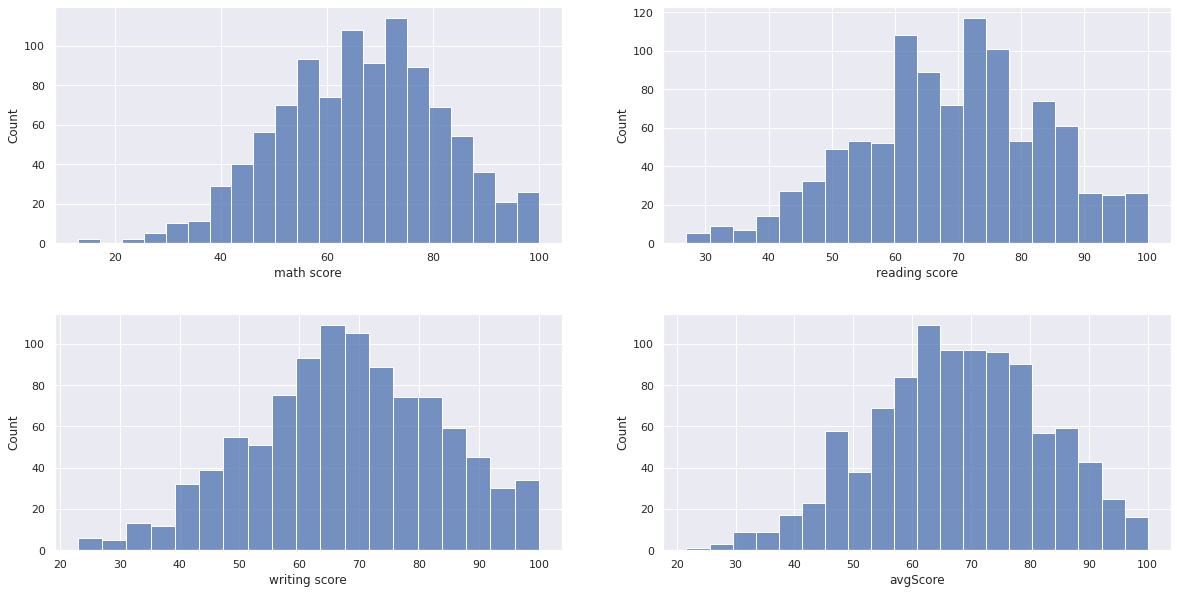

In [26]:
# Distribution of Scores
fig, ax = plt.subplots(2,2, figsize=(20,10))
plt.subplots_adjust(hspace=0.3)
sns.histplot(data=avgSet, x="math score", ax=ax[0,0])
sns.histplot(data=avgSet, x="reading score", ax=ax[0,1])
sns.histplot(data=avgSet, x="writing score", ax=ax[1,0])
sns.histplot(data=avgSet, x="avgScore", ax=ax[1,1])
plt.show()

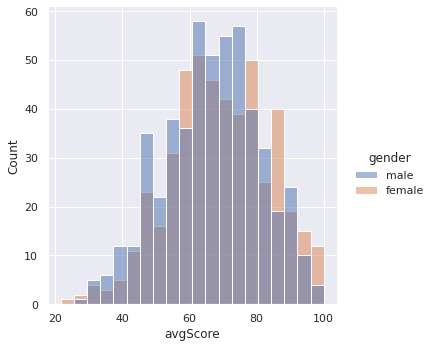

In [29]:
sns.displot(kind = 'hist', data = avgSet, x='avgScore', hue = 'gender')

plt.show()

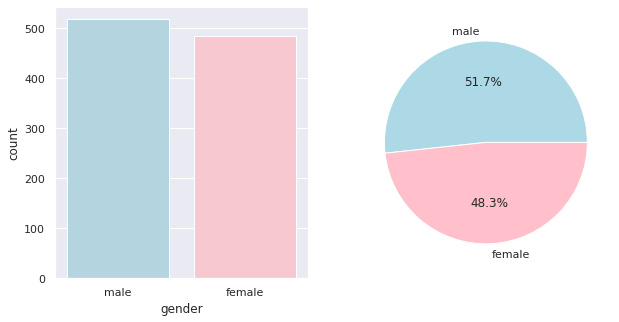

gender
male      517
female    483
dtype: int64


In [30]:
# Counts the total number of each gender
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(data=examSet,x="gender", palette=["lightblue","pink"], ax= ax[0])
genderCount = examSet.value_counts("gender")
ax[1] = plt.pie(genderCount, labels=genderCount.index, colors=["lightblue","pink"], autopct="%.1f%%")
plt.show()
print(genderCount)

<ipython-input-31-bd650ba46194>:9: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only
  groupCount = examSet.value_counts("race/ethnicity").sort_index(0)


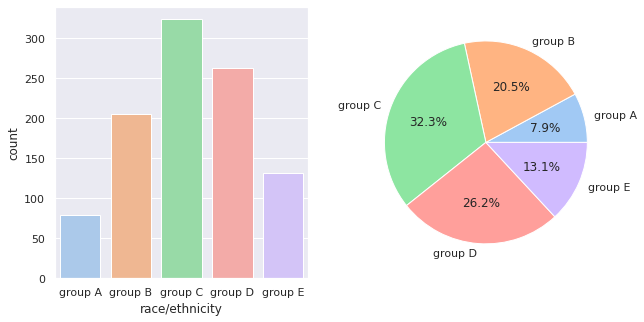

race/ethnicity
group A     79
group B    205
group C    323
group D    262
group E    131
dtype: int64


In [31]:
# Counts the total number of each group(race/ethnicity)
# sns.countplot(data=examSet,x="race/ethnicity")
# plt.show()
# print(examSet["race/ethnicity"].value_counts().sort_index())

# Counts the total number of each gender
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(data=examSet,x="race/ethnicity", palette="pastel", ax= ax[0])
groupCount = examSet.value_counts("race/ethnicity").sort_index(0)
ax[1] = plt.pie(groupCount, labels=groupCount.index, colors=sns.color_palette("pastel"), autopct="%.1f%%")
plt.show()
print(groupCount)



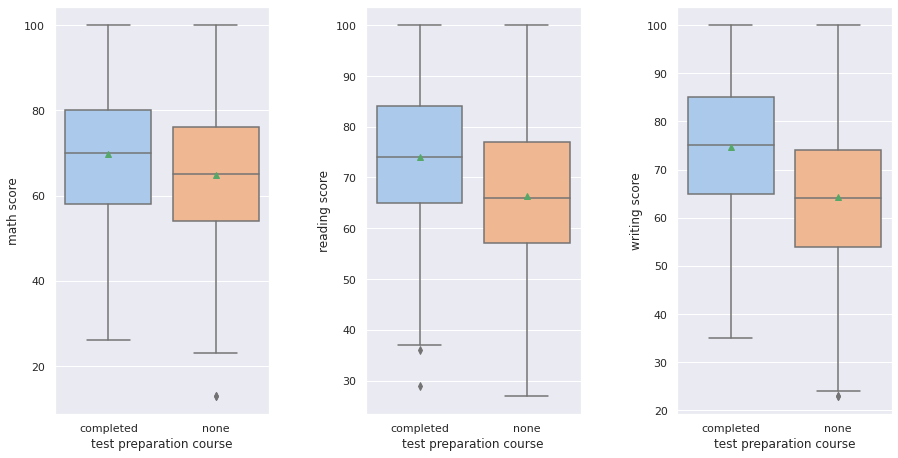

In [32]:
# Correlation between Test Preparation and Student's Grade
fig, ax = plt.subplots(1,3, figsize=(15,7.5))
plt.subplots_adjust(wspace= 0.45)
sns.boxplot(data=examSet, x="test preparation course", y="math score", palette="pastel", showmeans=True, ax=ax[0])
sns.boxplot(data=examSet, x="test preparation course", y="reading score", palette="pastel", showmeans=True, ax=ax[1])
sns.boxplot(data=examSet, x="test preparation course", y="writing score", palette="pastel", showmeans=True, ax=ax[2])

plt.show()

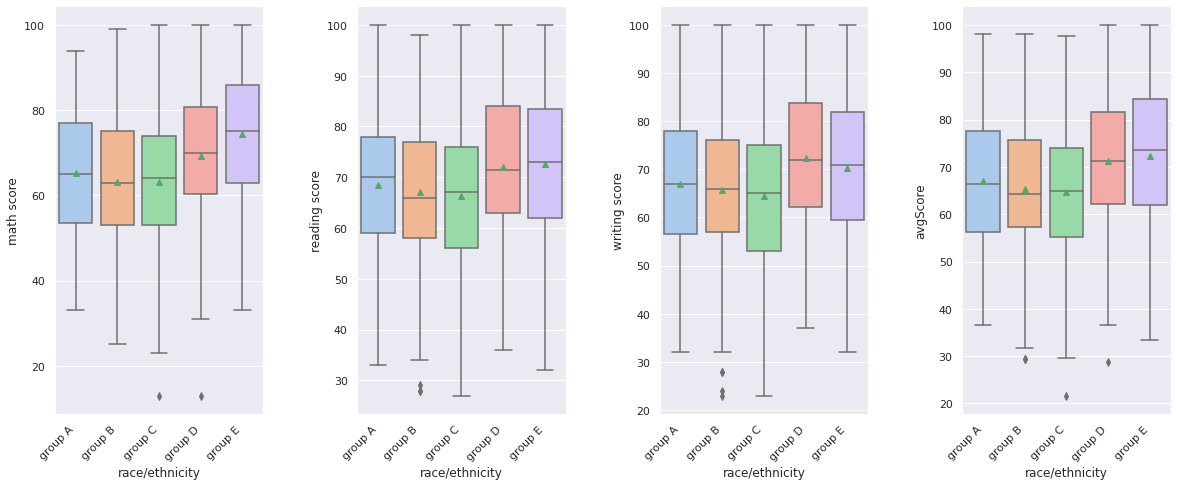

In [33]:
# Correlation between Group and Student's Grade
groupSet = avgSet.sort_values("race/ethnicity")

fig, ax = plt.subplots(1,4, figsize=(20,7.5))
plt.subplots_adjust(wspace= 0.45)
b1 = sns.boxplot(data=groupSet, x="race/ethnicity", y="math score", palette="pastel", showmeans=True, ax=ax[0])
b2 = sns.boxplot(data=groupSet, x="race/ethnicity", y="reading score", palette="pastel", showmeans=True, ax=ax[1])
b3 = sns.boxplot(data=groupSet, x="race/ethnicity", y="writing score", palette="pastel", showmeans=True, ax=ax[2])
b4 = sns.boxplot(data=groupSet, x="race/ethnicity", y="avgScore", palette="pastel", showmeans=True, ax=ax[3])

b1.set_xticklabels(b1.get_xticklabels(), rotation=45, ha="right")
b2.set_xticklabels(b2.get_xticklabels(), rotation=45, ha="right")
b3.set_xticklabels(b3.get_xticklabels(), rotation=45, ha="right")
b4.set_xticklabels(b4.get_xticklabels(), rotation=45, ha="right")

#print(groupSet)
plt.show()

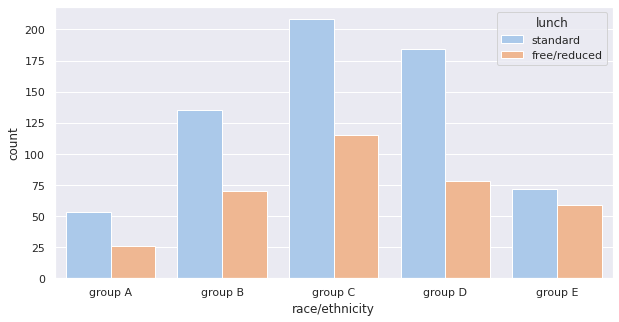

In [34]:
# Relation between Groups and Lunch

plt.subplots(1,1,figsize=(10,5))
sns.countplot(data=examSet, x="race/ethnicity", hue="lunch", palette="pastel")
plt.show()

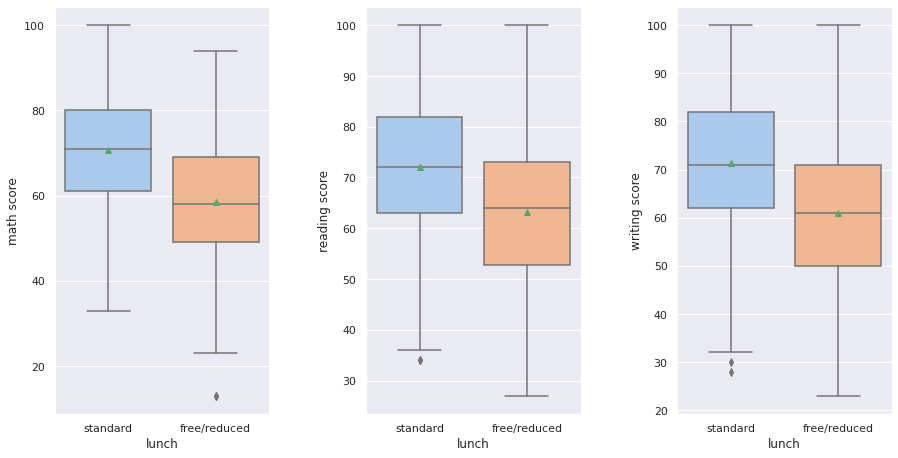

In [35]:
# Correlation between Lunch and Student's Grade
fig, ax = plt.subplots(1,3, figsize=(15,7.5))
plt.subplots_adjust(wspace= 0.45)
sns.boxplot(data=examSet, x="lunch", y="math score", palette="pastel", showmeans=True, ax=ax[0])
sns.boxplot(data=examSet, x="lunch", y="reading score", palette="pastel", showmeans=True, ax=ax[1])
sns.boxplot(data=examSet, x="lunch", y="writing score", palette="pastel", showmeans=True, ax=ax[2])

plt.show()

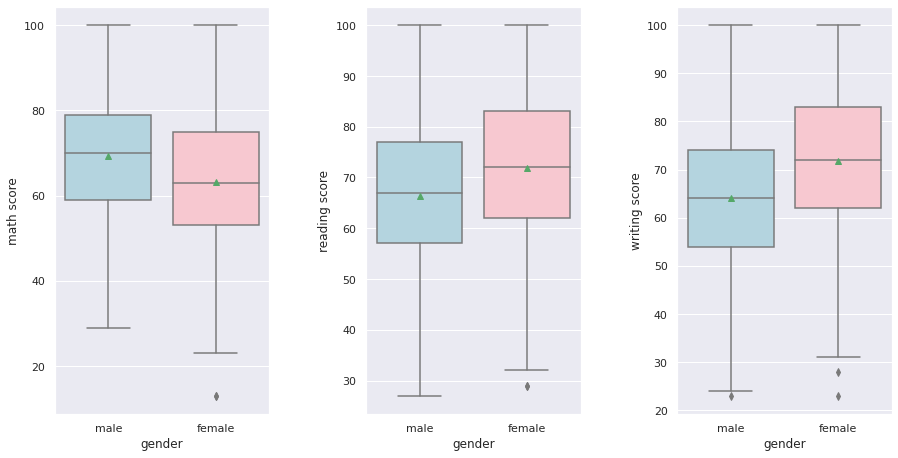

In [36]:
# Correlation between Gender and their Grades
fig, ax = plt.subplots(1,3, figsize=(15,7.5))
plt.subplots_adjust(wspace= 0.45)
sns.boxplot(data=examSet, x="gender", y="math score", palette=["lightblue","pink"], showmeans=True, ax=ax[0])
sns.boxplot(data=examSet, x="gender", y="reading score", palette=["lightblue","pink"], showmeans=True, ax=ax[1])
sns.boxplot(data=examSet, x="gender", y="writing score", palette=["lightblue","pink"], showmeans=True, ax=ax[2])

plt.show()

                             index
parental level of education       
some high school                 0
high school                      1
some college                     2
associate's degree               3
bachelor's degree                4
master's degree                  5


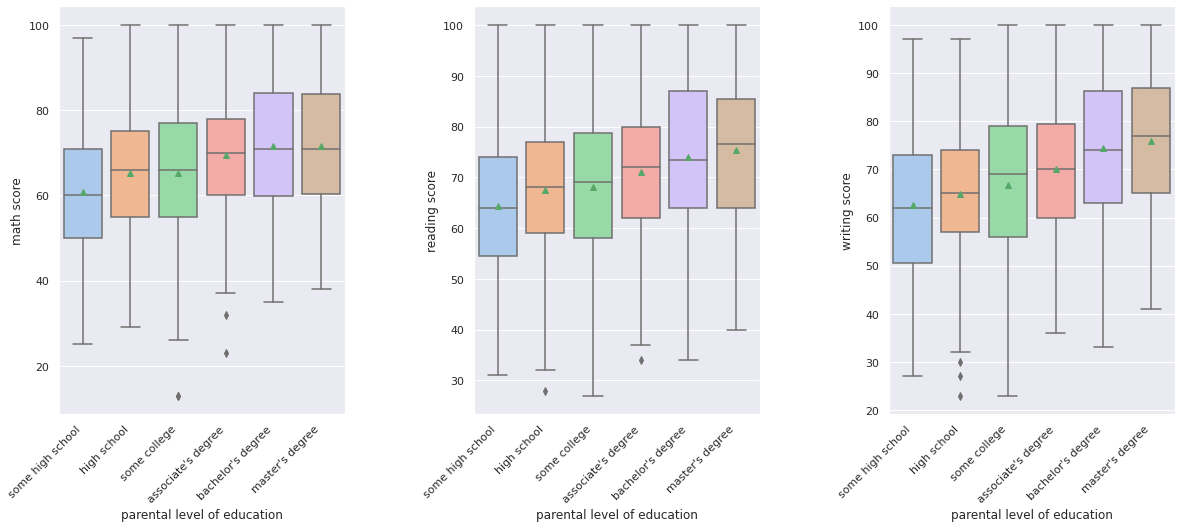

In [37]:
# Sort DataFrame based on number years in school (some high school -> master's degree)
mapping = pd.DataFrame({"parental level of education" : ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]})
sortMap = mapping.reset_index().set_index("parental level of education")
parentGroupSet = avgSet.copy()
parentGroupSet["parent level"] = parentGroupSet["parental level of education"].map(sortMap["index"])
parentGroupSet = parentGroupSet.sort_values("parent level")

# Correlation between Parent's Level of Education and Student's Grade
fig, ax = plt.subplots(1,3, figsize=(20,7.5))
plt.subplots_adjust(wspace= 0.45)
b1 = sns.boxplot(data=parentGroupSet, x="parental level of education", y="math score", palette="pastel", showmeans=True, ax=ax[0])
b2 = sns.boxplot(data=parentGroupSet, x="parental level of education", y="reading score", palette="pastel", showmeans=True, ax=ax[1])
b3 = sns.boxplot(data=parentGroupSet, x="parental level of education", y="writing score", palette="pastel", showmeans=True, ax=ax[2])

b1.set_xticklabels(b1.get_xticklabels(), rotation=45, ha="right")
b2.set_xticklabels(b2.get_xticklabels(), rotation=45, ha="right")
b3.set_xticklabels(b3.get_xticklabels(), rotation=45, ha="right")


print(sortMap)
plt.show()

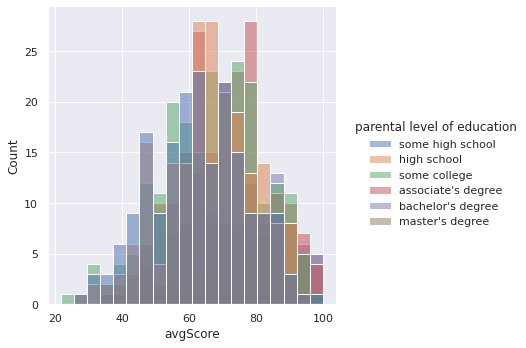

In [38]:

sns.displot(kind = 'hist', data = parentGroupSet, x='avgScore', hue = 'parental level of education')



Shape: (3,3)

Analysis: 
(0,1): 


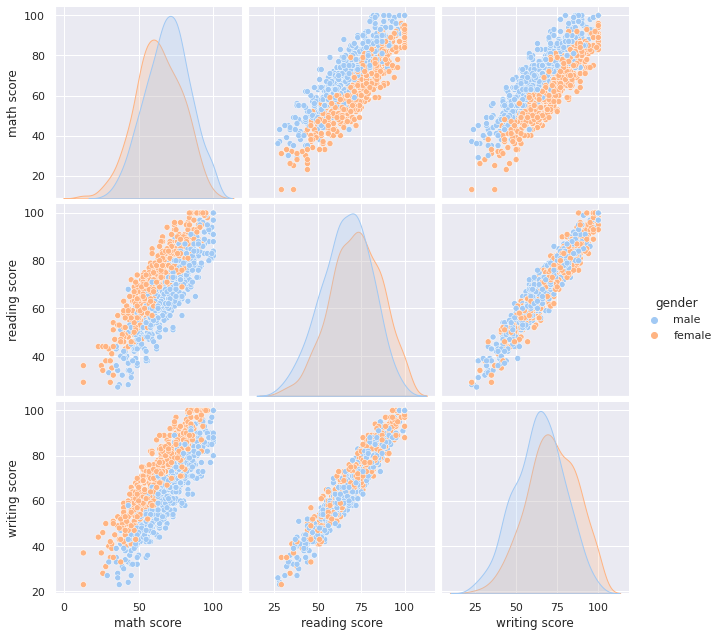

In [39]:
sns.pairplot(examSet, hue='gender', palette="pastel", height=3);

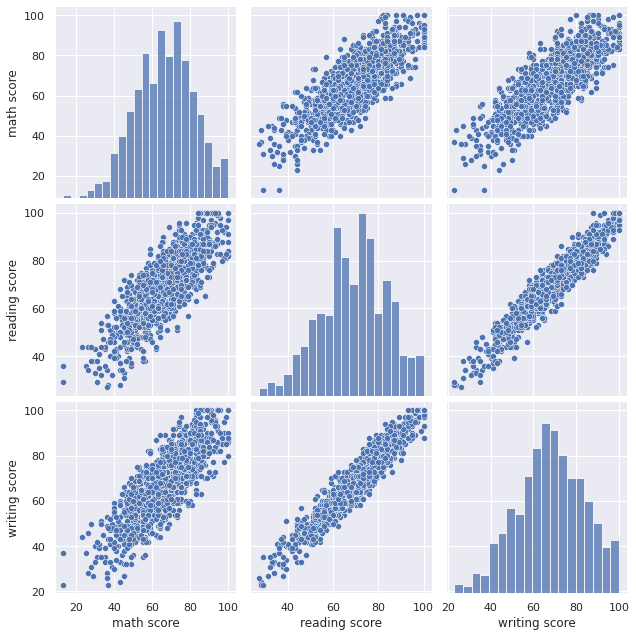

In [40]:
sns.pairplot(examSet, palette="pastel", height=3);


0.9829247088231474
0.0
y =  0.9829247088231474 x +  0.0


<ipython-input-27-1dfb7012d3ce>:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(readScore[:,np.newaxis],writeScore)


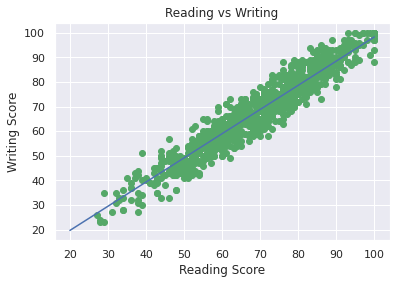

In [27]:
#Ethan Individual Portion


from pandas.core.algorithms import mode
readScore = avgSet["reading score"]
writeScore = avgSet["writing score"]

plt.scatter(readScore,writeScore, c="g")

from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)

model.fit(readScore[:,np.newaxis],writeScore)
print(model.coef_[0])
print(model.intercept_)
print("y = ", model.coef_[0], "x + ", model.intercept_)

xfit = np.linspace(20,100,1000)
yfit = model.predict(xfit[:,np.newaxis])

plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.title("Reading vs Writing")
plt.plot(xfit, yfit)

0.9513359879297378
0.0
y =  0.9513359879297378 x +  0.0
1.121484270306964
0.0
y =  1.121484270306964 x +  0.0


<ipython-input-44-5ae1d1d36d6e>:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maleModel.fit(male["math score"][:,np.newaxis],male["reading score"])
<ipython-input-44-5ae1d1d36d6e>:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  femaleModel.fit(female["math score"][:,np.newaxis],female["reading score"])


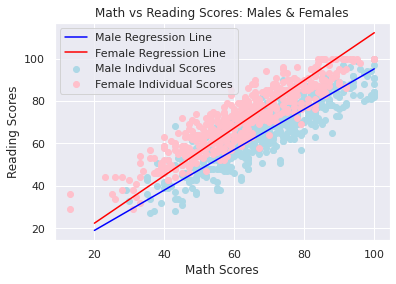

In [44]:

#Payton Individual Portion

from pandas.core.algorithms import mode
male = avgSet.loc[avgSet["gender"] == "male"]
female = avgSet.loc[avgSet["gender"] == "female"]

plt.scatter(male["math score"], male["reading score"], c="lightblue")

plt.scatter(female["math score"],female["reading score"], c="pink")

from sklearn.linear_model import LinearRegression

maleModel = LinearRegression(fit_intercept=False)
femaleModel = LinearRegression(fit_intercept=False)


maleModel.fit(male["math score"][:,np.newaxis],male["reading score"])
femaleModel.fit(female["math score"][:,np.newaxis],female["reading score"])

#male
print(maleModel.coef_[0])
print(maleModel.intercept_)
print("y = ", maleModel.coef_[0], "x + ", maleModel.intercept_)

maleX = np.linspace(20,100,1000)
maleY = maleModel.predict(maleX[:,np.newaxis])

#female
print(femaleModel.coef_[0])
print(femaleModel.intercept_)
print("y = ", femaleModel.coef_[0], "x + ", femaleModel.intercept_)

femaleX = np.linspace(20,100,1000)
femaleY = femaleModel.predict(femaleX[:,np.newaxis])

plt.xlabel("Math Scores")
plt.ylabel("Reading Scores")
plt.title("Math vs Reading Scores: Males & Females")

plt.plot(maleX, maleY,"blue",femaleX,femaleY,"red")
plt.legend(["Male Regression Line","Female Regression Line","Male Indivdual Scores","Female Individual Scores"])